In [25]:
file = 'branch_test.csv'

In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)
df

,depth,left,cost
0,1,True,0.007527
1,1,False,0.007510
2,2,True,0.008469
3,2,False,0.008281
4,3,True,0.009390
...,...,...,...
399,100,False,0.111663
400,0,True,0.005976
401,0,False,0.005936
402,0,True,0.005968


In [27]:
left_data = df[df['left'] == True]['cost'].groupby(df['depth'], sort=True).mean().sort_index()
right_data = df[df['left'] == False]['cost'].groupby(df['depth'], sort=True).mean().sort_index()
right_data

depth
0      0.005922
1      0.007511
2      0.008402
3      0.008821
4      0.009442
         ...   
96     0.112927
97     0.110865
98     0.110009
99     0.110845
100    0.111711
Name: cost, Length: 101, dtype: float64

In [28]:
end = 100

x = [i for i in range(0, end + 1)]
y1 = left_data.values[:end + 1]
y2 = right_data.values[:end + 1]

In [29]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = False)
model1.fit((np.array(x)).reshape(-1, 1), (y1 - y1[0]))
print(y1[0])
print(model1.coef_)
y1_pred = model1.predict((np.array(x)).reshape(-1, 1)) + y1[0]

model2 = LinearRegression(fit_intercept = False)
model2.fit((np.array(x)).reshape(-1, 1), (y2 - y2[0]))
print(y2[0])
print(model2.coef_)
y2_pred = model2.predict(np.array(x).reshape(-1, 1)) + y2[0]

0.00597219301077225
[0.00214572]
0.0059216424512366
[0.0009927]


(0.0, 0.23985372858587653)

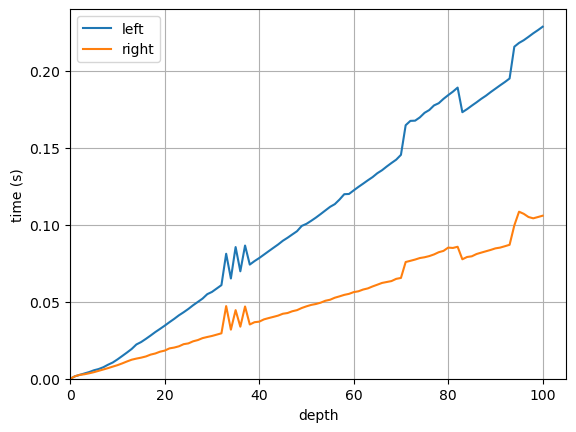

In [30]:
import matplotlib.pyplot as plt

plt.plot(x, y1 - y1[0], label='left')
# plt.plot(x, y1_pred - y1[0], label='left_predict')
plt.plot(x, y2 - y2[0], label='right')
# plt.plot(x, y2_pred - y2[0], label='right_predict')
plt.ylabel('time (s)')
plt.xlabel('depth')
plt.legend()
plt.grid()
plt.xlim(0)
plt.ylim(0)

(0.0, 0.0025376605466502057)

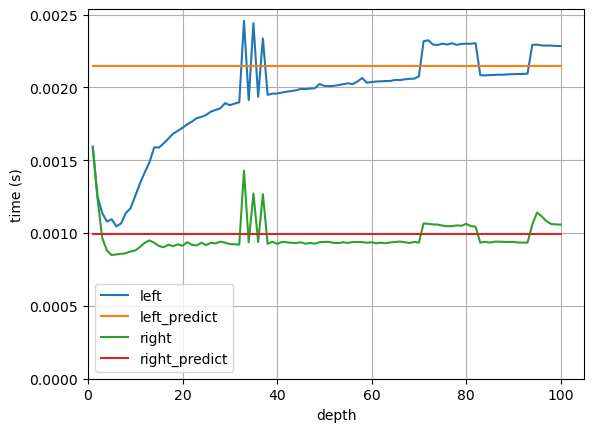

In [31]:
import matplotlib.pyplot as plt

plt.plot(x[1:], (y1 - y1[0])[1:] / x[1:], label='left')
plt.plot(x[1:], (y1_pred - y1[0])[1:] / x[1:], label='left_predict')
plt.plot(x[1:], (y2 - y2[0])[1:] / x[1:], label='right')
plt.plot(x[1:], (y2_pred - y2[0])[1:] / x[1:], label='right_predict')
plt.ylabel('time (s)')
plt.xlabel('depth')
plt.legend()
plt.grid()
plt.xlim(0)
plt.ylim(0)

(0.0, 2.3035575748658292)

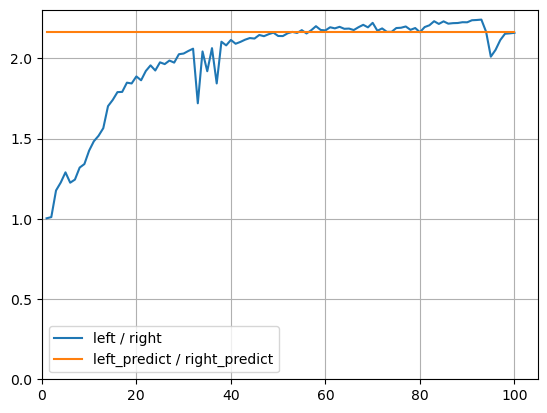

In [32]:
plt.plot(x[1:], (y1 - y1[0])[1:] / (y2 - y2[0])[1:], label='left / right')
plt.plot(x[1:], (y1_pred - y1[0])[1:] / (y2_pred - y2[0])[1:], label='left_predict / right_predict')
plt.legend()
plt.grid()
plt.xlim(0)
plt.ylim(0)